In [4]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as plt
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/kazi/nltk_data...


True

In [5]:
data = pd.read_csv('Data/customer_review.csv')
data.head(5)

,ID,Review
0,1,Excellent service my claim was dealt with very...
1,2,Very sympathetically dealt within all aspects ...
2,3,Having received yet another ludicrous quote fr...
3,4,Very prompt and fair handling of claim. A mino...
4,5,Very good and excellent value for money simple...


In [7]:
SIA = SentimentIntensityAnalyzer()
SIA

In [9]:
# sentence = 'sentence'
# sentiment_dict = SIA.polarity_scores(sentence)
# sentiment_dict
# output: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.0772}

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.0772}

In [10]:
data['polarity_score']=data.Review.apply(lambda x:SIA.polarity_scores(x)['compound'])
data['neutral_score']=data.Review.apply(lambda x:SIA.polarity_scores(x)['neu'])
data['negative_score']=data.Review.apply(lambda x:SIA.polarity_scores(x)['neg'])
data['positive_score']=data.Review.apply(lambda x:SIA.polarity_scores(x)['pos'])
data['sentiment']=''
data.loc[data.polarity_score>0,'sentiment']='POSITIVE'
data.loc[data.polarity_score==0,'sentiment']='NEUTRAL'
data.loc[data.polarity_score<0,'sentiment']='NEGATIVE'
data

,ID,Review,polarity_score,neutral_score,negative_score,positive_score,sentiment
0,1,Excellent service my claim was dealt with very...,0.7346,0.618,0.000,0.382,POSITIVE
1,2,Very sympathetically dealt within all aspects ...,-0.8155,0.680,0.320,0.000,NEGATIVE
2,3,Having received yet another ludicrous quote fr...,0.9785,0.711,0.039,0.251,POSITIVE
3,4,Very prompt and fair handling of claim. A mino...,0.1440,0.651,0.135,0.214,POSITIVE
4,5,Very good and excellent value for money simple...,0.8610,0.485,0.000,0.515,POSITIVE
...,...,...,...,...,...,...,...
1611,1612,I did not like that the company wanted extra m...,-0.5603,0.833,0.167,0.000,NEGATIVE
1612,1613,I contacted with regards to our Home and Cont...,0.8589,0.861,0.000,0.139,POSITIVE
1613,1614,I first dealt with when I had to insure my mu...,0.9247,0.714,0.000,0.286,POSITIVE
1614,1615,Rang to update address on our multi-car polic...,0.7257,0.894,0.000,0.106,POSITIVE


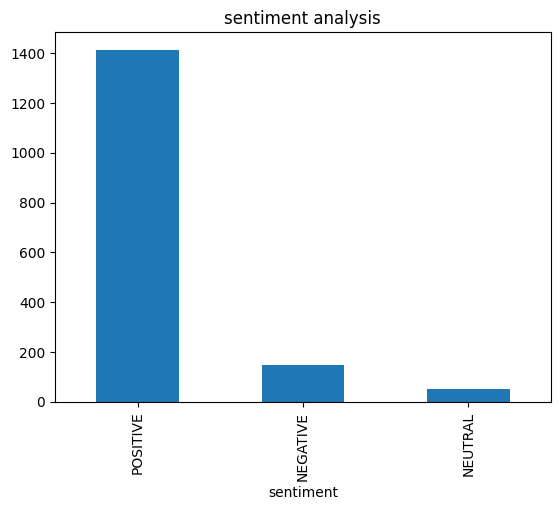

In [11]:
data.sentiment.value_counts().plot(kind='bar',title="sentiment analysis")
plt.show()